# Application

## Mackenzie N. Austin

#### Process Optimization

In [1]:
import pulp

# Define products and their profit contribution
products = ['Product A', 'Product B', 'Product C']
profit = {'Product A': 10, 'Product B': 12, 'Product C': 8}

# Define resources and their constraints
resources = {'Labor Hours': 2000, 'Machine Availability': 1500}

# Define the LP problem as maximization
lp_problem = pulp.LpProblem("Process_Optimization", pulp.LpMaximize)

# Define decision variables (amount of each product to produce)
x = {product: pulp.LpVariable(f"Production_{product}", lowBound=0, cat='Integer') for product in products}

# Set the objective function (maximize profit)
lp_problem += pulp.lpSum(profit[product] * x[product] for product in products)

# Add resource constraints
lp_problem += pulp.lpSum(x[product] for product in products) <= resources['Labor Hours'], "Labor_Hours_Constraint"
lp_problem += 2 * x['Product A'] + 3 * x['Product B'] + 2 * x['Product C'] <= resources['Machine Availability'], "Machine_Availability_Constraint"

# Solve the LP problem
lp_problem.solve()

# Print the optimization results
if pulp.LpStatus[lp_problem.status] == "Optimal":
    print("Optimal Solution Found:")
    for product in products:
        print(f"Produce {product}: {int(x[product].varValue)} units")
    print(f"Maximized Profit: ${pulp.value(lp_problem.objective)}")
else:
    print("No optimal solution found. Check constraints or adjust the problem.")

Optimal Solution Found:
Produce Product A: 750 units
Produce Product B: 0 units
Produce Product C: 0 units
Maximized Profit: $7500.0


#### Inventory Control

In [2]:
import math

# Inventory parameters
demand_rate = 1000  # Average units demanded per year
ordering_cost = 200  # Cost per order
holding_cost = 10  # Annual holding cost per unit
lead_time = 5  # Lead time in days
days_per_year = 365  # Number of days in a year

# Calculate the Economic Order Quantity (EOQ)
EOQ = math.sqrt((2 * demand_rate * ordering_cost) / holding_cost)

# Calculate the reorder point
reorder_point = (demand_rate / days_per_year) * (lead_time + EOQ)

# Calculate the reorder quantity
reorder_quantity = EOQ

# Simulate inventory management over a year
starting_inventory = 2 * EOQ  # Initial inventory
total_cost = 0

for day in range(1, days_per_year + 1):
    if starting_inventory < reorder_point:
        order_quantity = reorder_quantity
        total_cost += ordering_cost
    else:
        order_quantity = 0

    demand = demand_rate / days_per_year
    starting_inventory += order_quantity - demand
    if starting_inventory < 0:
        starting_inventory = 0
    total_cost += starting_inventory * (holding_cost / days_per_year)

# Print the optimization results
print(f"Economic Order Quantity (EOQ): {EOQ:.2f} units")
print(f"Reorder Point: {reorder_point:.2f} units")
print(f"Reorder Quantity: {reorder_quantity:.2f} units")
print(f"Total Cost: ${total_cost:.2f}")

Economic Order Quantity (EOQ): 200.00 units
Reorder Point: 561.64 units
Reorder Quantity: 200.00 units
Total Cost: $7802.74


#### Transportation Scheduling

In [3]:
import pulp

# Define products, routes, and transportation costs
products = ['Product A', 'Product B', 'Product C']
routes = ['Route 1', 'Route 2', 'Route 3']
transportation_costs = {
    ('Product A', 'Route 1'): 10,
    ('Product A', 'Route 2'): 15,
    ('Product A', 'Route 3'): 20,
    ('Product B', 'Route 1'): 12,
    ('Product B', 'Route 2'): 14,
    ('Product B', 'Route 3'): 18,
    ('Product C', 'Route 1'): 8,
    ('Product C', 'Route 2'): 13,
    ('Product C', 'Route 3'): 16,
}

# Define product demand and route capacity
product_demand = {
    'Product A': 100,
    'Product B': 150,
    'Product C': 120,
}
route_capacity = {
    'Route 1': 200,
    'Route 2': 250,
    'Route 3': 180,
}

# Create a linear programming problem to minimize transportation costs
lp_problem = pulp.LpProblem("Transportation_Scheduling", pulp.LpMinimize)

# Define decision variables (amount of each product to transport on each route)
x = {(product, route): pulp.LpVariable(f"Transport_{product}_{route}", lowBound=0, cat='Integer') for product in products for route in routes}

# Objective function (minimize transportation costs)
lp_problem += pulp.lpSum(transportation_costs[(product, route)] * x[(product, route)] for product in products for route in routes)

# Add constraints
# 1. Product demand constraints
for product in products:
    lp_problem += pulp.lpSum(x[(product, route)] for route in routes) == product_demand[product], f"{product}_Demand"

# 2. Route capacity constraints
for route in routes:
    lp_problem += pulp.lpSum(x[(product, route)] for product in products) <= route_capacity[route], f"{route}_Capacity"

# Solve the LP problem
lp_problem.solve()

# Print the optimization results
if pulp.LpStatus[lp_problem.status] == "Optimal":
    print("Optimal Solution Found:")
    for product in products:
        for route in routes:
            amount = int(x[(product, route)].varValue)
            if amount > 0:
                print(f"Transport {amount} units of {product} on {route}")
    print(f"Total Transportation Cost: ${pulp.value(lp_problem.objective)}")
else:
    print("No optimal solution found. Check constraints or adjust the problem.")

Optimal Solution Found:
Transport 100 units of Product A on Route 1
Transport 150 units of Product B on Route 2
Transport 100 units of Product C on Route 1
Transport 20 units of Product C on Route 2
Total Transportation Cost: $4160.0


#### Forecasting

C:\Users\maustin\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maustin\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maustin\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maustin\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ValueError: too many values to unpack (expected 3)

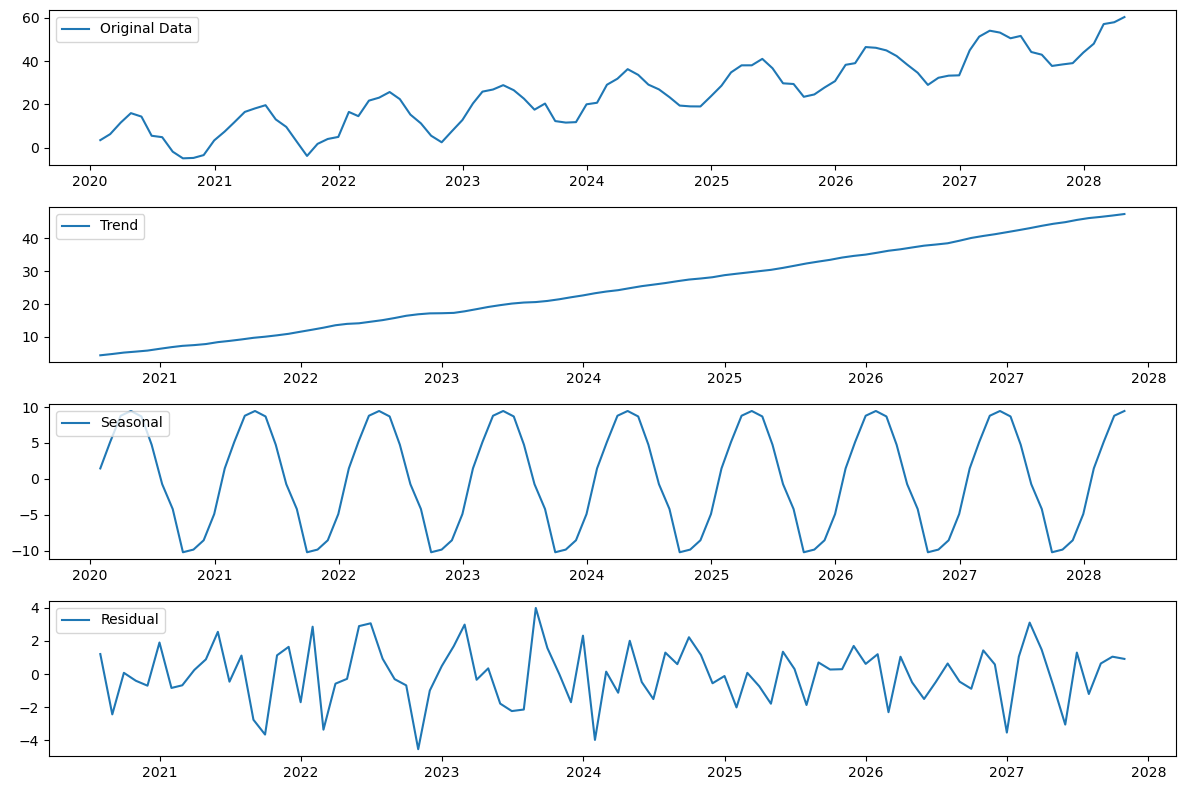

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate a synthetic time series dataset
np.random.seed(0)
n = 100
t = np.arange(0, n)
seasonal_component = 10 * np.sin(2 * np.pi * t / 12)
trend_component = 0.5 * t
noise = np.random.normal(0, 2, n)
data = trend_component + seasonal_component + noise

# Create a Pandas DataFrame
df = pd.DataFrame({'Date': pd.date_range(start='2020-01-01', periods=n, freq='M'), 'Value': data})

# Perform time series decomposition (trend, seasonal, residual)
decomposition = sm.tsa.seasonal_decompose(df['Value'], model='additive', period = 12)

# Plot the original data, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Date'], df['Value'], label='Original Data')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(df['Date'], decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(df['Date'], decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(df['Date'], decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()

# Fit an ARIMA model to the residual component
arima_order = (2, 1, 1)  # You should determine the order based on model selection criteria
model = sm.tsa.ARIMA(decomposition.resid.dropna(), order=arima_order)
results = model.fit()

# Forecast future values
forecast_steps = 12
forecast, stderr, conf_int = results.forecast(steps=forecast_steps, alpha=0.05)

# Plot the forecasted values and their confidence intervals
forecast_dates = pd.date_range(start='2022-01-01', periods=forecast_steps, freq='M')
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Value'], label='Original Data')
plt.plot(forecast_dates, forecast, label='Forecast', linestyle='--')
plt.fill_between(forecast_dates, conf_int[:, 0], conf_int[:, 1], alpha=0.2, label='95% Confidence Interval')
plt.legend()
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()
plt.show()

#### Vendor Performance

In [8]:
import pandas as pd

# Load vendor performance data (example data)
data = {
    'VendorID': [1, 2, 3, 4, 5],
    'VendorName': ['Vendor A', 'Vendor B', 'Vendor C', 'Vendor D', 'Vendor E'],
    'PurchaseOrders': [150, 120, 90, 200, 180],
    'OnTimeDeliveries': [130, 110, 80, 195, 170],
    'QualityScore': [4.7, 4.9, 4.5, 4.6, 4.8],
    'CostPerformance': [0.98, 0.99, 0.97, 0.96, 0.98]
}

df = pd.DataFrame(data)

# Define performance evaluation criteria
target_purchase_orders = 150  # Target number of purchase orders
target_on_time_deliveries = 95  # Target percentage of on-time deliveries
target_quality_score = 4.6  # Target quality score
target_cost_performance = 0.98  # Target cost performance

# Calculate vendor performance scores
df['PurchaseOrderScore'] = df['PurchaseOrders'] / target_purchase_orders
df['OnTimeDeliveryScore'] = df['OnTimeDeliveries'] / target_on_time_deliveries
df['QualityScore'] = df['QualityScore'] / target_quality_score
df['CostPerformanceScore'] = df['CostPerformance'] / target_cost_performance

# Calculate an overall performance score (you can define your own formula)
df['OverallPerformanceScore'] = (
    0.4 * df['PurchaseOrderScore'] +
    0.2 * df['OnTimeDeliveryScore'] +
    0.2 * df['QualityScore'] +
    0.2 * df['CostPerformanceScore']
)

# Rank vendors based on overall performance
df['PerformanceRank'] = df['OverallPerformanceScore'].rank(ascending=False).astype(int)

# Print the vendor performance report
print("Vendor Performance Report:")
print(df)

# Identify top-performing vendors
top_vendors = df[df['PerformanceRank'] == 1]
print("\nTop-Performing Vendor(s):")
print(top_vendors[['VendorID', 'VendorName', 'OverallPerformanceScore']])

# Identify areas for improvement
low_performing_vendors = df[df['OverallPerformanceScore'] < 1.0]
print("\nVendors Needing Improvement:")
print(low_performing_vendors[['VendorID', 'VendorName', 'OverallPerformanceScore']])

Vendor Performance Report:
   VendorID VendorName  PurchaseOrders  OnTimeDeliveries  QualityScore  \
0         1   Vendor A             150               130      1.021739   
1         2   Vendor B             120               110      1.065217   
2         3   Vendor C              90                80      0.978261   
3         4   Vendor D             200               195      1.000000   
4         5   Vendor E             180               170      1.043478   

   CostPerformance  PurchaseOrderScore  OnTimeDeliveryScore  \
0             0.98            1.000000             1.368421   
1             0.99            0.800000             1.157895   
2             0.97            0.600000             0.842105   
3             0.96            1.333333             2.052632   
4             0.98            1.200000             1.789474   

   CostPerformanceScore  OverallPerformanceScore  PerformanceRank  
0              1.000000                 1.078032                3  
1            